In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/home/nick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 782us/step - loss: 0.6374 - acc: 0.6184 - val_loss: 0.4671 - val_acc: 0.8004
Epoch 2/10
20000/20000 [==============================] - 16s 793us/step - loss: 0.3873 - acc: 0.8361 - val_loss: 0.3743 - val_acc: 0.8398
Epoch 3/10
20000/20000 [==============================] - 16s 789us/step - loss: 0.2924 - acc: 0.8844 - val_loss: 0.3565 - val_acc: 0.8504
Epoch 4/10
20000/20000 [==============================] - 16s 788us/step - loss: 0.2140 - acc: 0.9188 - val_loss: 0.3826 - val_acc: 0.8360
Epoch 5/10
20000/20000 [==============================] - 16s 791us/step - loss: 0.1551 - acc: 0.9453 - val_loss: 0.3737 - val_acc: 0.8568
Epoch 6/10
20000/20000 [==============================] - 16s 795us/step - loss: 0.1023 - acc: 0.9643 - val_loss: 0.5518 - val_acc: 0.7762
Epoch 7/10
20000/20000 [==============================] - 16s 795us/step - loss: 0.0704 - acc: 0.9772 - val_loss: 0.4

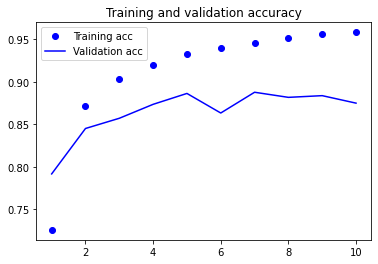

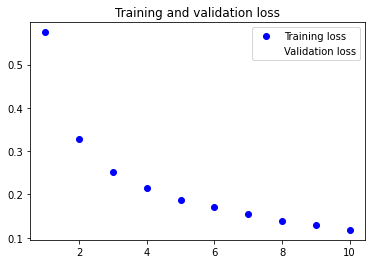

In [8]:
import matplotlib.pyplot as plt

def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label="Training loss")
    plt.plot(epochs, val_loss, ' b', label="Validation loss")
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
plot(history)

In [7]:
from keras.layers import LSTM

model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train,
                   y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

/home/nick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.5747 - acc: 0.7258 - val_loss: 0.4299 - val_acc: 0.7916
Epoch 2/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.3290 - acc: 0.8709 - val_loss: 0.3854 - val_acc: 0.8450
Epoch 3/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2524 - acc: 0.9038 - val_loss: 0.3310 - val_acc: 0.8570
Epoch 4/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2159 - acc: 0.9200 - val_loss: 0.3537 - val_acc: 0.8734
Epoch 5/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1868 - acc: 0.9324 - val_loss: 0.3122 - val_acc: 0.8862
Epoch 6/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1704 - acc: 0.9398 - val_loss: 0.3254 - val_acc: 0.8632
Epoch 7/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1560 - acc: 0.9459 - val_loss: 0.3516 - val_acc:

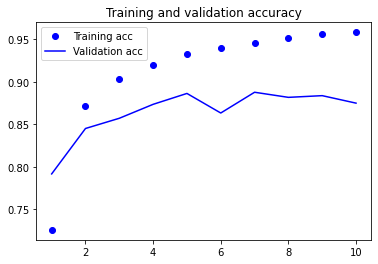

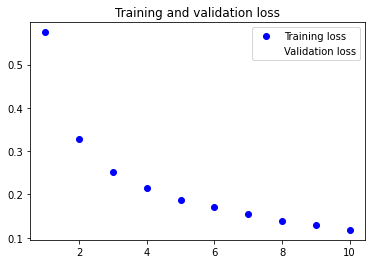

In [9]:
plot(history)